In [ ]:
Image classification of Chest X Rays in one of 2 classes: Normal, COVID-19



In [ ]:
pip install tensorflow

In [ ]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/preetviradiya/covid19-radiography-dataset")

Skipping, found downloaded files in "./covid19-radiography-dataset" (use force=True to force download)


In [16]:
! unzip Covid19_radiography_dataset

unzip:  cannot find or open Covid19_radiography_dataset, Covid19_radiography_dataset.zip or Covid19_radiography_dataset.ZIP.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML


In [ ]:
#finding directory 
import os

os.path.abspath("covid19-radiography-dataset")


In [ ]:
#changing directory 

In [ ]:
os.chdir('//Users//ellie//covid19-radiography-dataset//covid19-radiography-dataset')



In [20]:
import os

directory_path = 'covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID'

file_count = len(os.listdir(directory_path))
print(f"Number of files in the directory: {file_count}")


Number of files in the directory: 3616


In [21]:
import os

directory_path = 'covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal'

file_count = len(os.listdir(directory_path))
print(f"Number of files in the directory: {file_count}")

Number of files in the directory: 10192


In [5]:
pip install opencv-python

     |████████████████████████████████| 53.9 MB 9.2 MB/s eta 0:00:012    |██████████████▉                 | 24.9 MB 9.7 MB/s eta 0:00:03     |█████████████████████▌          | 36.2 MB 12.9 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

img_path = 'covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal/Normal-1.png'
img = cv2.imread(img_path)

if img is not None:
    # Image was successfully loaded
    # You can perform operations on the image here
    # For example, you can display the image using cv2.imshow() or save it using cv2.imwrite()
    print("Image loaded successfully!")
else:
    print("Error: Failed to load the image.")

Image loaded successfully!


In [7]:
import matplotlib.pyplot as plt

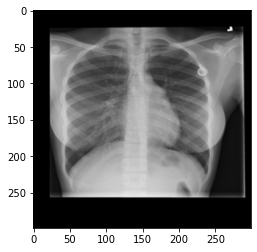

In [9]:
plt.imshow(img)

In [10]:
img.shape


(299, 299, 3)

In [11]:
import pandas as pd
import numpy as np


In [14]:
import pandas as pd

file_path = 'covid19-radiography-dataset/covid19-radiography-dataset/metadata.csv'
df = pd.read_csv(file_path)

# Perform operations on the DataFrame here
# You can access the data using df['column_name'] or perform data analysis/manipulation

# Example: Print the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 21165
Number of columns: 6


In [15]:
df.head()


,Unnamed: 0,file_name,image_data_grayscale,file_format,image_shape,label
0,0,COVID-1.png,[[185 40 0 ... 0 24 131]\n [ 75 14 0 ...,PNG,"(299, 299)",COVID
1,1,COVID-10.png,[[135 133 131 ... 24 21 19]\n [132 130 129 ...,PNG,"(299, 299)",COVID
2,2,COVID-100.png,[[ 62 10 0 ... 197 200 209]\n [ 35 6 0 ...,PNG,"(299, 299)",COVID
3,3,COVID-1000.png,[[162 162 162 ... 4 4 5]\n [ 26 26 26 ...,PNG,"(299, 299)",COVID
4,4,COVID-1001.png,[[ 0 0 0 ... 0 0 0]\n [ 0 0 0 ...,PNG,"(299, 299)",COVID


In [19]:
import os

directory_path = 'covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID'

urls = os.listdir(directory_path)
print(urls)

['COVID-1.png', 'COVID-1175.png', 'COVID-1613.png', 'COVID-948.png', 'COVID-790.png', 'COVID-3004.png', 'COVID-3010.png', 'COVID-1607.png', 'COVID-784.png', 'COVID-1161.png', 'COVID-2468.png', 'COVID-1149.png', 'COVID-2440.png', 'COVID-3038.png', 'COVID-2326.png', 'COVID-974.png', 'COVID-960.png', 'COVID-2332.png', 'COVID-2454.png', 'COVID-753.png', 'COVID-1808.png', 'COVID-747.png', 'COVID-2483.png', 'COVID-1834.png', 'COVID-1820.png', 'COVID-2497.png', 'COVID-2118.png', 'COVID-3206.png', 'COVID-592.png', 'COVID-1411.png', 'COVID-1377.png', 'COVID-3560.png', 'COVID-3574.png', 'COVID-1363.png', 'COVID-586.png', 'COVID-1405.png', 'COVID-3212.png', 'COVID-2124.png', 'COVID-2642.png', 'COVID-3548.png', 'COVID-2656.png', 'COVID-2130.png', 'COVID-1439.png', 'COVID-551.png', 'COVID-2865.png', 'COVID-237.png', 'COVID-223.png', 'COVID-2871.png', 'COVID-545.png', 'COVID-22.png', 'COVID-1388.png', 'COVID-2681.png', 'COVID-2859.png', 'COVID-2695.png', 'COVID-579.png', 'COVID-36.png', 'COVID-3372.

In [21]:
path = "covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID"
file_path = path + "/" + urls[0]
print(file_path)

covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID/COVID-1.png


In [22]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [23]:
covid_path = "covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [25]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [26]:
normal_path = "covid19-radiography-dataset/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [27]:
covidImages.shape

(3616, 100, 100, 3)

In [28]:
normalImages.shape

(10192, 100, 100, 3)

In [29]:
data = np.r_[covidImages, normalImages]

In [30]:
data.shape


(13808, 100, 100, 3)

In [31]:
targets = np.r_[covidTargets, normalTargets]

In [32]:
targets.shape

(13808,)

In [2]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install scikit-learn==0.24.2

from sklearn.model_selection import train_test_split



ERROR: Could not find a version that satisfies the requirement scikit-learn==1.23.0 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1)
ERROR: No matching distribution found for scikit-learn==1.23.0


In [1]:
from sklearn.model_selection import train_test_split


data = []  # Your data as a valid collection (e.g., list or numpy array)
targets = []  # Your targets as a valid collection (e.g., list or numpy array)

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

/Users/ellie/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
 import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

In [1]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [2]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined